batch normalisation make the training faster and stable
means:-
mean=0
s.d=1

reason for using the batch normalisation is the internal covariate shift

1st way of batch norm:-
Z11->Z11(N)->Z11(BN)->g(Z11(BN))->A11

Z11(BN)=yZ11(N)+b  y is scalling factor and b is shifting factor

2nd way

Z11->g(Z11)->N(g(Z11))->A11



In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  tensorflow import keras
from keras.layers import Dense,BatchNormalization
from keras.models import Sequential

In [26]:
df=pd.read_csv('ushape.csv')
df.columns=['x','y','class']

df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


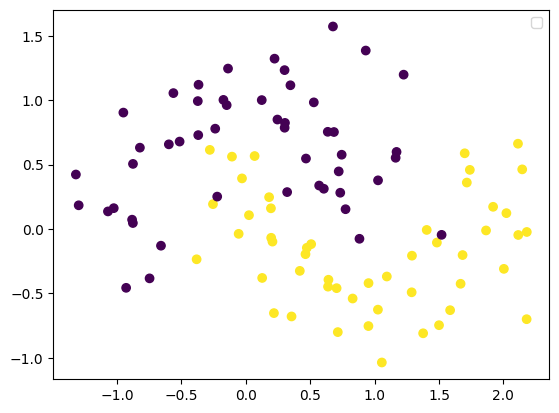

In [27]:
plt.scatter(df['x'],df['y'],c=df['class'])
plt.legend()
plt.show()

In [28]:
X=df.iloc[:,0:2]
y=df.iloc[:,2]

In [29]:
model=Sequential()
model.add(Dense(10,input_dim=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531 (2.07 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 80 (320.00 B)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(X,y,epochs=100,validation_split=0.2)  #validation_split=0.2 means 20% of data will be used for validation


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.6470 - loss: 0.5901 - val_accuracy: 0.5500 - val_loss: 0.6732
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6684 - loss: 0.6221 - val_accuracy: 0.6000 - val_loss: 0.6603
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7538 - loss: 0.5419 - val_accuracy: 0.8500 - val_loss: 0.6484
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7036 - loss: 0.5640 - val_accuracy: 0.9000 - val_loss: 0.6389
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7187 - loss: 0.5231 - val_accuracy: 0.9000 - val_loss: 0.6312
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7650 - loss: 0.5413 - val_accuracy: 0.9000 - val_loss: 0.6242
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7397 - loss: 0.5041 - val_accuracy: 0.9000 - val_loss: 0.6177
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7797 - loss: 0.4765 - val_accuracy: 0.9000 - val_loss

In [33]:
model.get_weights()

[array([[-0.6814147 ,  0.54910374, -0.24389239,  0.36907244,  0.16527174,
          0.31876543, -0.1724997 , -0.33872658, -0.06309432,  0.07441922],
        [-0.07987725, -0.5522129 ,  0.11312724,  0.09041141, -0.20525777,
         -0.5136141 ,  0.38867402, -0.6661208 , -0.32373708, -0.01513178]],
       dtype=float32),
 array([-0.00861671, -0.04505214,  0.05211954, -0.03164898,  0.03059044,
        -0.07504235, -0.01833215, -0.02025697,  0.03110879,  0.02464227],
       dtype=float32),
 array([1.0041084 , 1.0047176 , 0.97598344, 1.0128734 , 1.0130348 ,
        1.0480355 , 0.9861001 , 0.96554637, 0.9939045 , 0.9618062 ],
       dtype=float32),
 array([ 0.0653003 , -0.01243052, -0.02662093,  0.0515092 ,  0.00670034,
        -0.08888443,  0.06039747,  0.02883106, -0.0246363 , -0.01511442],
       dtype=float32),
 array([0.06849244, 0.32305598, 0.07342432, 0.23835869, 0.11333322,
        0.18576306, 0.11431254, 0.04208639, 0.04061916, 0.06118923],
       dtype=float32),
 array([0.07493769